In [75]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Baseline Model: Linear Regression

In [76]:
net_train = pd.read_pickle('../data/net_train.pkl')
net_val = pd.read_pickle('../data/net_val.pkl')
net_test = pd.read_pickle('../data/net_test.pkl')

In [3]:
def feature_eng(df):
    X_area = pd.get_dummies(df['area_id'], prefix='area', drop_first= True)

    X_day = [x.weekday() for x in df.index]
    X_day = pd.get_dummies(pd.Series(X_day), prefix='weekday', drop_first=True)

    X_time = ['{:02d}:{:02d}'.format(x.hour, x.minute) for x in df.index]

    X_time = pd.get_dummies(pd.Series(X_time), prefix='time', drop_first = True)

    X_list = [df[['Temperature', 'Precip']], X_area, X_day, X_time]
    [x.reset_index(drop = True, inplace = True) for x in X_list]

    X = pd.concat(X_list, axis = 1)

    y = df['net_inflow']
    return X, y

In [4]:
X_train, y_train = feature_eng(net_train)
X_val, y_val = feature_eng(net_val)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train, net_train['net_inflow'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
(mean_squared_error(y_val, lr.predict(X_val)))**0.5

7.096018585197669

In [11]:
mean_absolute_error(y_val, lr.predict(X_val))

4.614124455750795

## Residuals

In [60]:
isarea10 = X_val['area_10'] == 1
isarea20 = X_val['area_20'] == 1

In [61]:
y_val_10 = y_val[list(isarea10)]
y_val_hat_10 = lr.predict(X_val)[list(isarea10)]
y_val_20 = y_val[list(isarea20)]
y_val_hat_20 = lr.predict(X_val)[list(isarea20)]

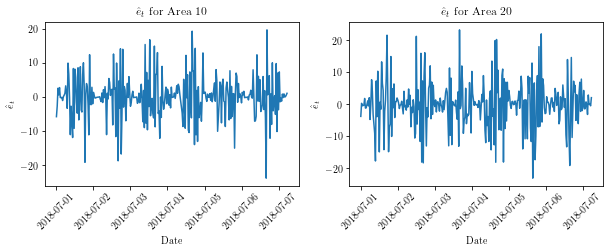

In [74]:
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
plt.plot(y_val_10.index[:300], (y_val_10 - y_val_hat_10).iloc[:300])
plt.ylabel('$\hat e_t$')
plt.xlabel('Date')
plt.title(u'$\hat e_t$ for Area 10')

plt.subplot(1, 2, 2)
plt.xticks(rotation = 45)
plt.plot(y_val_20.index[:300], (y_val_20 - y_val_hat_20).iloc[:300])
plt.ylabel('$\hat e_t$')
plt.xlabel('Date')
plt.title(u'$\hat e_t$ for Area 20')
plt.savefig('residual.eps')